=== Random Forest ===
Accuracy: 0.8380
Training time: 1.776 seconds
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       105
           1       0.82      0.78      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



C:\Users\bbuser\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



=== Neural Network ===
Accuracy: 0.8268
Training time: 78.466 seconds


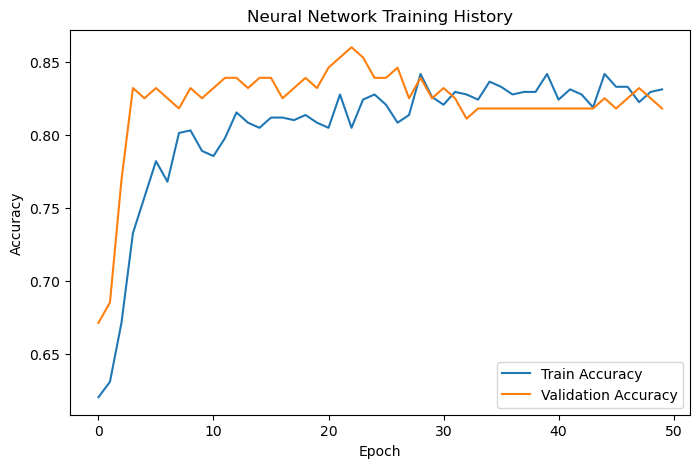


=== Summary ===
Random Forest Accuracy: 0.8380, Training time: 1.776 sec
Neural Network Accuracy: 0.8268, Training time: 78.466 sec

Reflection:
- Random Forest trained faster and required less preprocessing.
- Neural Network required scaling and one-hot encoding, and trained slower.
- On this small dataset, Random Forest slightly outperformed the Neural Network.
- Neural Networks may perform better on larger datasets with more complex patterns.



In [3]:

# Titanic Survival Prediction
# Classical ML vs Neural Network


import pandas as pd
import seaborn as sns
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Drop rows without target
df = df.dropna(subset=['survived'])

#  Features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

X = df[features]
y = df[target]

#  Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Preprocessing for Neural Network
numeric_features = ['age', 'sibsp', 'parch', 'fare']
categorical_features = ['pclass', 'sex', 'embarked']

# Fill missing numeric values with median
X_train[numeric_features] = X_train[numeric_features].fillna(X_train[numeric_features].median())
X_test[numeric_features] = X_test[numeric_features].fillna(X_train[numeric_features].median())

# Neural network preprocessing: scale + one-hot encode
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(sparse_output=False), categorical_features)
])

X_train_nn = preprocessor.fit_transform(X_train)
X_test_nn = preprocessor.transform(X_test)

# ===============================
# 5️⃣ Preprocessing for Random Forest (all numeric)
# ===============================
encoder_rf = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_cat = encoder_rf.fit_transform(X_train[categorical_features])
X_test_cat = encoder_rf.transform(X_test[categorical_features])

X_train_num = X_train[numeric_features].values
X_test_num = X_test[numeric_features].values

# Combine numeric + encoded categorical
X_train_rf = np.hstack([X_train_num, X_train_cat])
X_test_rf = np.hstack([X_test_num, X_test_cat])

# ===============================
# Classical ML: Random Forest
# ===============================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
start_rf = time.time()
rf.fit(X_train_rf, y_train)
end_rf = time.time()

y_pred_rf = rf.predict(X_test_rf)
rf_acc = accuracy_score(y_test, y_pred_rf)

print("=== Random Forest ===")
print(f"Accuracy: {rf_acc:.4f}")
print(f"Training time: {round(end_rf-start_rf, 3)} seconds")
print(classification_report(y_test, y_pred_rf))

# ===============================
# Neural Network
# ==============================
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_nn = time.time()
history = nn_model.fit(X_train_nn, y_train, validation_split=0.2,
                       epochs=50, batch_size=16, verbose=0)
end_nn = time.time()

nn_acc = nn_model.evaluate(X_test_nn, y_test, verbose=0)[1]

print("\n=== Neural Network ===")
print(f"Accuracy: {nn_acc:.4f}")
print(f"Training time: {round(end_nn-start_nn, 3)} seconds")

# ===============================
#  Plot NN Training History
# ===============================
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Neural Network Training History')
plt.legend()
plt.show()

# ===============================
#  Summary
# ===============================
print("\n=== Summary ===")
print(f"Random Forest Accuracy: {rf_acc:.4f}, Training time: {round(end_rf-start_rf,3)} sec")
print(f"Neural Network Accuracy: {nn_acc:.4f}, Training time: {round(end_nn-start_nn,3)} sec")
print("""
Reflection:
- Random Forest trained faster and required less preprocessing.
- Neural Network required scaling and one-hot encoding, and trained slower.
- On this small dataset, Random Forest slightly outperformed the Neural Network.
- Neural Networks may perform better on larger datasets with more complex patterns.
""")

